https://wikidocs.net/109251


서브워드 토크나이저
https://wikidocs.net/86649




https://jalammar.github.io/illustrated-bert/


BERT는 33억개의 단어들로 사전 학습된 모델
다양한 곳에서 사용되고있음


파인튜닝
예)기존의 bert에 파인튜닝을 해서 한국어를 학습시켜서 판례 관련 모델을 만든다


bert에서 좋은 모델이 만들어지려면 가장 필요한 것은 무엇일까?
데이터


LLM

bert는 입력문장을 단어로 분류
학습 과정에서 분류기를 만들어야한다
bert는 분류기가 아니라 언어모델
기존의 bert를 classifier로 만들기 위해 training을 해야함 ->파인 튜닝
To train such a model, you mainly have to train the classifier, with minimal changes happening to the BERT model during the training phase.  ->파인튜닝과정

https://wikidocs.net/108730

사전 훈련된 언어 모델의 강점은 학습 전 사람이 별도 레이블을 지정해줄 필요가 없다는 점


방대한 텍스트로 LSTM 언어 모델을 학습->LLM


마스크드 언어 모델(Masked Language Model)
->bert의 대표적인 학습방법


3. BERT의 문맥을 반영한 임베딩(Contextual Embedding)

cls-> special token

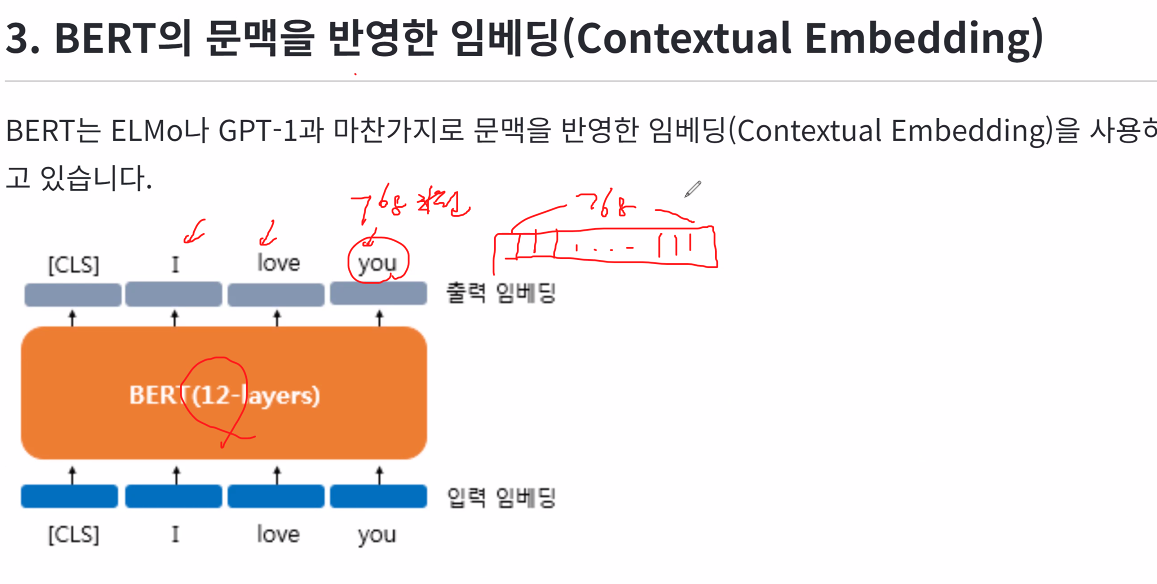




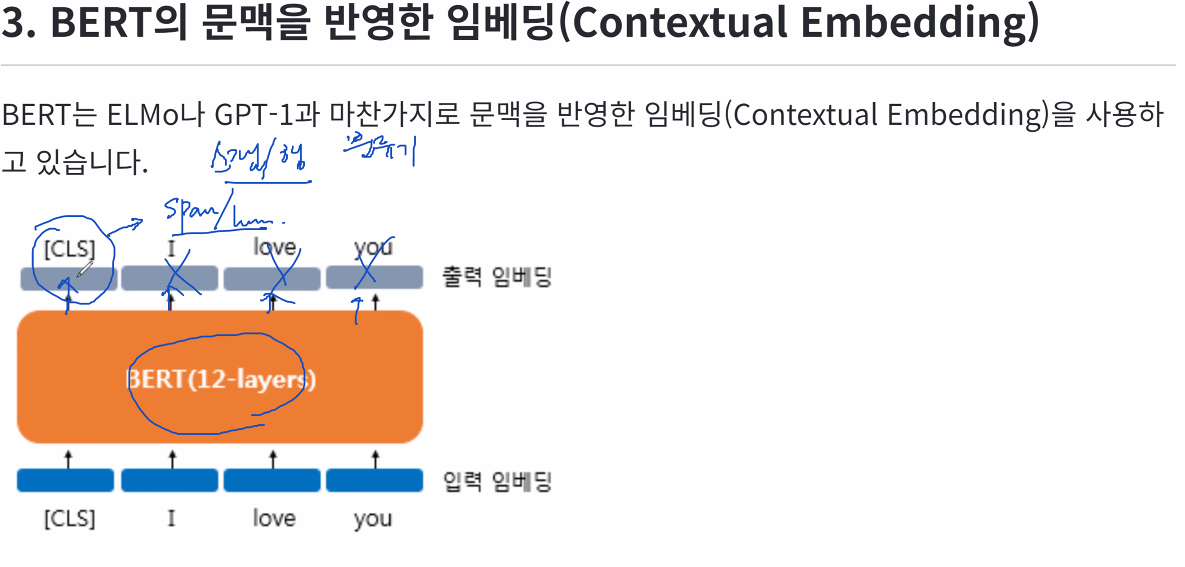

https://wikidocs.net/86649




13-02 센텐스피스(SentencePiece)


실습

In [1]:
pip install sentencepiece

     ---------------------------------------- 0.0/977.5 kB ? eta -:--:--
     ------------------------------------  972.8/977.5 kB 31.1 MB/s eta 0:00:01
     ------------------------------------- 977.5/977.5 kB 15.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sentencepiece as spm
import pandas as pd
import urllib.request
import csv

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x2465b3ecc90>)

In [16]:
train_df = pd.read_csv('IMDb_Reviews.csv')
train_df['review']

0        My family and I normally do not watch local mo...
1        Believe it or not, this was at one time the wo...
2        After some internet surfing, I found the "Home...
3        One of the most unheralded great works of anim...
4        It was the Sixties, and anyone with long hair ...
                               ...                        
49995    the people who came up with this are SICK AND ...
49996    The script is so so laughable... this in turn,...
49997    "So there's this bride, you see, and she gets ...
49998    Your mind will not be satisfied by this nobud...
49999    The chaser's war on everything is a weekly sho...
Name: review, Length: 50000, dtype: object

In [7]:
#텍스트파일로 저장해서 sentencepiece 로 구성해야함

In [9]:
with open('imdb_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(train_df['review']))
    #텍스트파일로 저장

In [11]:
spm.SentencePieceTrainer.Train('--input=imdb_review.txt --model_prefix=imdb --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')
#vocabulary만들기(기존 단어들의 subword들로)
#--input= 텍스트파일 지정, --vocab_size -> 단어 집합의 크기, --model_type=bpe ->  bpe 알고리즘 적용

In [12]:
#imdb.vocab 파일을 열면 단어 집합을 확인할 수 있다

In [18]:
pd.read_csv('imdb.vocab',sep='\t',header=None,quoting=csv.QUOTE_NONE)


,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,▁t,0
4,▁a,-1
...,...,...
4995,8,-4992
4996,4,-4993
4997,7,-4994
4998,&,-4995


In [34]:
vocab_list = pd.read_csv('imdb.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list.sample(10)

,0,1
3806,▁information,-3803
3269,▁gag,-3266
3864,▁trailer,-3861
1330,play,-1327
1788,▁told,-1785
530,▁scene,-527
2428,▁stri,-2425
3429,▁magic,-3426
1668,▁moment,-1665
241,▁E,-238


In [35]:
sp = spm.SentencePieceProcessor()
vocab_file = "imdb.model"
sp.load(vocab_file)
#sp를 이용해서 각각의 단어들을 정수로 변환 가능

True

In [36]:
lines = [
  "I didn't at all think of it this way.",
  "I have waited a long time for someone to film"
]

In [39]:
sp.encode_as_pieces(lines[0]) #문장을 subword로 변환
#sp.encode_as_ids(lines[0]) #문장 ->정수 코드로 변환

['▁I',
 '▁didn',
 "'",
 't',
 '▁at',
 '▁all',
 '▁think',
 '▁of',
 '▁it',
 '▁this',
 '▁way',
 '.']

In [40]:
sp.PieceToId('▁I')

41

In [42]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
#네이버 영화 리뷰 데이터

('ratings.txt', <http.client.HTTPMessage at 0x2461907bad0>)

In [43]:
naver_df = pd.read_table('ratings.txt')
naver_df[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [44]:
naver_df = naver_df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(naver_df.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [45]:
print('리뷰 개수 :',len(naver_df)) # 리뷰 개수 출력

리뷰 개수 : 199992


In [46]:
with open('naver_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(naver_df['document']))

In [47]:
spm.SentencePieceTrainer.Train('--input=naver_review.txt --model_prefix=naver --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

In [50]:
vocab_list = pd.read_csv('naver.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list[:10]

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,..,0
4,영화,-1
5,▁영화,-2
6,▁이,-3
7,▁아,-4
8,...,-5
9,ᄏᄏ,-6


In [51]:
sp = spm.SentencePieceProcessor()
vocab_file = "naver.model"
sp.load(vocab_file)

True

In [52]:
lines = [
  "뭐 이딴 것도 영화냐.",
  "진짜 최고의 영화입니다 ㅋㅋ",
]

In [57]:
sp.encode_as_pieces(lines[1])

['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ']

In [63]:
sp.PieceToId('▁영화')

5

In [65]:
sp.DecodePieces(['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ'])

'진짜 최고의 영화입니다 ᄏᄏ'

In [66]:
sp.DecodeIds([54, 200, 821, 85])

'진짜 원 산~~'

In [67]:
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=str))
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=int))

['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ']
[54, 204, 825, 121]


https://wikidocs.net/115055
4. BERT의 서브워드 토크나이저 : WordPiece


In [68]:
import pandas as pd
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased") # Bert-base의 토크나이저

100%|███████████████████████████████████████████████████████████████████████| 231508/231508 [00:00<00:00, 384746.42B/s]


In [70]:
tokenizer.vocab_size

30522

In [71]:
tokenizer.vocab

OrderedDict([('[PAD]', 0),
             ('[unused0]', 1),
             ('[unused1]', 2),
             ('[unused2]', 3),
             ('[unused3]', 4),
             ('[unused4]', 5),
             ('[unused5]', 6),
             ('[unused6]', 7),
             ('[unused7]', 8),
             ('[unused8]', 9),
             ('[unused9]', 10),
             ('[unused10]', 11),
             ('[unused11]', 12),
             ('[unused12]', 13),
             ('[unused13]', 14),
             ('[unused14]', 15),
             ('[unused15]', 16),
             ('[unused16]', 17),
             ('[unused17]', 18),
             ('[unused18]', 19),
             ('[unused19]', 20),
             ('[unused20]', 21),
             ('[unused21]', 22),
             ('[unused22]', 23),
             ('[unused23]', 24),
             ('[unused24]', 25),
             ('[unused25]', 26),
             ('[unused26]', 27),
             ('[unused27]', 28),
             ('[unused28]', 29),
             ('[unused29]', 30),
  

In [72]:
tokenizer.vocab['db']

16962

In [73]:
tokenizer.vocab['love']

2293

In [74]:
tokenizer.vocab['loves']

7459

In [75]:
tokenizer.vocab['embeddings'] #없음 --> OOV

KeyError: 'embeddings'

In [76]:
#하지만 없더라도 여러 단어의 조합으로 표현 가능

In [77]:
tokenizer.vocab['em']

7861

In [78]:
tokenizer.vocab['##bed']

8270

In [79]:
tokenizer.vocab['##ding']

4667

In [80]:
tokenizer.vocab['##s']

2015

In [82]:
tokenizer.tokenize('Here is the sentence I want embeddings for.')
#토큰단위로 쪼개줌

['here',
 'is',
 'the',
 'sentence',
 'i',
 'want',
 'em',
 '##bed',
 '##ding',
 '##s',
 'for',
 '.']

In [85]:
with open('vocabulary.txt', 'w',encoding='utf8') as f:
  for token in tokenizer.vocab.keys():
    f.write(token + '\n')

In [86]:
#vocabulary.txt 파일 생김

In [87]:
df = pd.read_fwf('vocabulary.txt', header=None)
df

,0
0,[PAD]
1,[unused0]
2,[unused1]
3,[unused2]
4,[unused3]
...,...
30517,##．
30518,##／
30519,##：
30520,##？


### bert에서 별도로 약속된 특별토큰

[PAD] - 0            패딩 관련
[UNK] - 100            unknown
[CLS] - 101            classifier
[SEP] - 102                
[MASK] - 103


### https://wikidocs.net/115055
    
6. BERT의 사전 훈련(Pre-training)

BERT의 사전 훈련 방법은 크게 두 가지로 나뉩니다. 첫번째는 마스크드 언어 모델이고, 두번째는 다음 문장 예측(Next sentence prediction, NSP)입니다.


1) 마스크드 언어 모델(Masked Language Model, MLM)

입력 텍스트의 15%의 단어를 랜덤으로 마스킹(Masking)합니다. 그리고 인공 신경망에게 이 가려진 단어들을(Masked words) 예측하도록 합니다.



In [88]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


https://huggingface.co/

In [89]:
import pandas as pd
from transformers import BertTokenizer

In [90]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [91]:
result = tokenizer.tokenize('Here is the sentence I want embeddings for.')
print(result)

['here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.']


In [92]:
print(tokenizer.vocab['here'])

2182


2182

In [96]:
df.iloc[2182]

0    here
Name: 2182, dtype: object